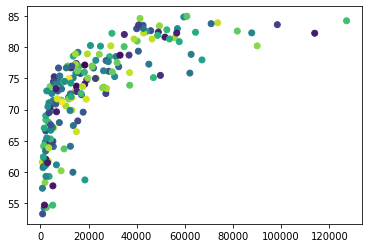

['SVN', 'DEU', 'AUT', 'BEL', 'FIN', 'PRT', 'GRC', 'LUX', 'NLD', 'NZL', 'IRL', 'NOR', 'CAN', 'MLT', 'BMU', 'FRA', 'SWE', 'ISR', 'ISL', 'KOR', 'AUS', 'ITA', 'ESP', 'SGP', 'CHE', 'CYM', 'MAC', 'JPN', 'HKG', 'SMR']
[38905.5478569196, 53639.26072156, 55833.3156857561, 51742.7263830791, 48689.2341509211, 34879.7059746537, 29723.2219580446, 113940.23744151, 56629.110793233, 42877.9429107086, 87786.1569266174, 64452.812617024, 49006.7431073981, 43950.5880527847, 81804.2656772398, 45834.1669122703, 52531.1743768398, 40007.3191584114, 56913.9568467085, 42719.0002563009, 49455.5385080697, 42662.5223699096, 40805.9169678996, 98411.5820616053, 70920.3247255393, 73633.7016276696, 127161.499444924, 41380.0935773113, 59586.2040065092, 60847.1067610929]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from sklearn import datasets 

#disabilityExpected = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\expected-years-of-living-with-disability-or-disease-burden.csv")
gdpworldbank = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\gdp.csv", index_col = False)
lifeExpectancy = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\life-expectancy.csv", index_col = False)
#maddison = pd.read_csv(r"C:\Users\Tjend\OneDrive\Documents\Python\DAT405\lab1\DAT405\maddisongdp.csv")

GDPRelevantYear = gdpworldbank[gdpworldbank["Year"] == 2019]
lifeRelevantYear = lifeExpectancy[lifeExpectancy["Year"] == 2019]
GDPRelevantYear.reset_index(drop=True, inplace=True)
lifeRelevantYear.reset_index(drop=True, inplace=True)

for i in range(1,len(GDPRelevantYear)):
    if pd.isna(GDPRelevantYear.Code[i]) == True:
        GDPRelevantYear = GDPRelevantYear.drop(i)

for i in range(1,len(lifeRelevantYear)):
    if pd.isna(lifeRelevantYear.Code[i]) == True:
        lifeRelevantYear = lifeRelevantYear.drop(i)

GDPRelevantYear.reset_index(drop=True, inplace=True)
lifeRelevantYear.reset_index(drop=True, inplace=True)

def relateData(lifeExpectancy, GDPData):
    xData = []
    yData = []
    countryData = []

    CodeDataLife = lifeExpectancy.Code
    CodeDataGDP = GDPData.Code
    for i in range(len(lifeExpectancy)):
        for j in range(len(GDPData)):
            if CodeDataGDP[j] == CodeDataLife[i]:
                xData.append(lifeExpectancy.LifeExpectancy[i])
                yData.append(GDPData.GDPPC[j])
                countryData.append(CodeDataLife[i])
    return(xData, yData, countryData)


testData = relateData(lifeRelevantYear, GDPRelevantYear)
yData = testData[0]
xData = testData[1]
countryData = testData[2]

N = len(yData)
colors = np.random.rand(N)
plt.scatter(xData, yData, c=colors)
plt.show()

sortedY = yData.copy()
sortedY.sort()
sortedCountry = []
sortedXData = []
j = 0
i = -1

while j < len(yData):
    i += 1
    if sortedY[j] == yData[i]:
        sortedCountry.append(countryData[i])
        sortedXData.append(xData[i])
        j += 1
        i = -1

boundOfPoverty = int(np.ceil(len(sortedY)*0.84))
countriesAboveBoundry = sortedCountry[boundOfPoverty:len(sortedCountry)]
print(countriesAboveBoundry)
bestCountries = sortedXData[boundOfPoverty:len(sortedCountry)]
print(bestCountries)

Problem 1
a) we decide to scatter plot data which has some correlation to one another, that is, if year and location is the same we scatter plot the given life expectancy vs. gdp data. The data clearing we did for this part was that we decided to only look at the year 2019 (which was the last common year, hence most relevant). Furthermore we didnt consider countries which didnt have a assigned code. The reason for only looking at a certain year is because of the dynamic economic growth of countries, so in order to present a good visualization a 3D graph is needed.

b) We can notice that genrally higher GDP per capita results in a longer expected life time, which is expected. Furthermore we can see that living in different countries affects the expected life time, which is the explination of the logarithmic curveture (big difference in the lower region of GDP per capita). Furthermore after a certain GDP/capita we can see that the expected life time almost doesnt increase, this is because in this case everyone in that country can afford medical help. 

d) We know from the normal distribution that the lower 84% of the distribution is the set which contains the countries which is not above one standard deviation of the distribution, hence we can sort the countries according to life expectancy and conclude that the upper most 16% of countries is above one standard deviation.